## ***Project Name:*** 🛒 Shopper Spectrum - Customer Segmentation and Product Recommendations in E-Commerce

##### **Project Type**    - Unsupervised Machine Learning and Collaborative Filtering 
##### **Contribution**    - Individual

### **Project Summary -**
This project analyzes e-commerce transaction data to segment customers and recommend products. Using RFM (Recency, Frequency, Monetary) analysis, customers are grouped into segments like High-Value, Regular, Occasional, and At-Risk via clustering algorithms (e.g., KMeans). A collaborative filtering-based recommendation system suggests similar products to customers using past purchase patterns. The solution is deployed as a Streamlit web app offering interactive customer segmentation and product recommendation modules. The approach helps businesses target marketing, personalize recommendations, and optimize inventory based on customer behavior.

### **GitHub Link -**

### **Problem Statement -**
The global e-commerce industry generates vast amounts of transaction data daily, offering valuable insights into customer purchasing behaviors. Analyzing this data is essential for identifying meaningful customer segments and recommending relevant products to enhance customer experience and drive business growth. This project aims to examine transaction data from an online retail business to uncover patterns in customer purchase behavior, segment customers based on Recency, Frequency, and Monetary (RFM) analysis, and develop a product recommendation system using collaborative filtering techniques.

### ***Let's Begin !***

### ***1. Know Your Data***

#### Import Libraries

In [6]:
# Import libraries
# Core libraries
import pandas as pd 
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Time library
from datetime import timedelta

# Machine learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage

# Save model library
import joblib

# Streamlit library for web app
import streamlit as st


#### Dataset Loading

#### Dataset First View

In [7]:
# Load dataset
df = pd.read_csv("data/online_retail.csv")

In [8]:
# Dataset first view
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


#### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count
print('Row: ', df.shape[0])
print('Columns: ', df.shape[1])

Row:  541909
Columns:  8


#### Dataset information

In [10]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [11]:
# Dataset description
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2023-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


#### Unique values in each column

In [12]:
# Check Unique Values for each variable.
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

#### Missing values/Null values

In [13]:
# Check for missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Description      1454
CustomerID     135080
dtype: int64


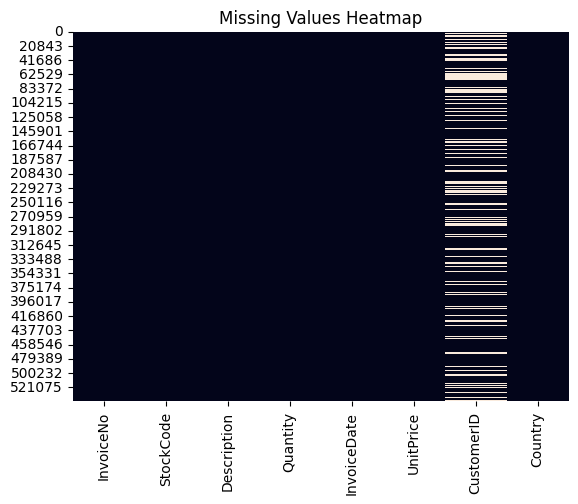

In [14]:
# Visualizing the missing values
null = df.isnull().sum()
print(null[null > 0])
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

#### Duplicate values

In [15]:
# Check for duplicate values
print('Duplicate values: ', df.duplicated().sum())

Duplicate values:  5268


### 📊 Dataset Overview 

- **Total Rows:** 541,909  
- **Columns:** 8    

#### Data Columns and Types
| Column       | Non-Null Count | Data Type | Description                          |
|--------------|----------------|-----------|------------------------------------|
| InvoiceNo    | 541,909        | object    | Transaction number                  |
| StockCode    | 541,909        | object    | Unique product/item code            |
| Description  | 540,455        | object    | Product name                       |
| Quantity     | 541,909        | int64     | Number of products purchased       |
| InvoiceDate  | 541,909        | object    | Date and time of transaction       |
| UnitPrice    | 541,909        | float64   | Price per product                   |
| CustomerID   | 406,829        | float64   | Unique customer identifier         |
| Country      | 541,909        | object    | Customer's country                  |

#### 🕵️‍♂️ Key Observations 

- **Missing Values:**  
  - `Description`: 1,454 missing entries (~0.27%)  
  - `CustomerID`: 13,5080 missing entries (~24.93%) — significant portion missing; these rows may need to be excluded or handled carefully since `CustomerID` is vital for segmentation and recommendation.

- **Duplicate Values:**  
  - 5,268 duplicate rows found, should be reviewed and removed for data quality.

- **InvoiceDate:** Stored as object/string — requires conversion to datetime for analysis.

- **CustomerID:** Stored as float64, but customer IDs should be treated as categorical or string during preprocessing.
---

### ***2. Data Preprocessing***

#### Remove duplicate values

In [16]:
# Remove duplicate values
df = df.drop_duplicates()

# Check for duplicate values
print('Duplicate values: ', df.duplicated().sum())

Duplicate values:  0


#### Remove Missing Values or Null values

In [17]:
# Remove rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

# Check for missing values
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### Exclude cancelled invoices (InvoiceNo starting with 'C')

In [18]:
# Check for cancelled invoices
print('Cancelled invoices: ', df[df['InvoiceNo'].astype(str).str.startswith('C')].count().iloc[0])

Cancelled invoices:  8872


In [19]:
# Exclude cancelled invoices (InvoiceNo starting with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Check for cancelled invoices
print('Cancelled invoices: ', df[df['InvoiceNo'].astype(str).str.startswith('C')].count().iloc[0])

Cancelled invoices:  0


#### Remove negative or zero quantities and prices

In [20]:
# Check for negative or zero quantities and prices
print('Negative or zero quantities: ', df[df['Quantity'] <= 0].count().iloc[0])
print('Negative or zero prices: ', df[df['UnitPrice'] <= 0].count().iloc[0])

Negative or zero quantities:  0
Negative or zero prices:  40


In [21]:
# Remove negative or zero quantities and prices
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Check for negative or zero quantities and prices
print('Negative or zero prices: ', df[df['UnitPrice'] <= 0].count().iloc[0])

Negative or zero prices:  0


#### Convert `InvoiceDate` to datetime format`

In [22]:
# Check `InvoiceDate` data type
df['InvoiceDate'].dtype

dtype('O')

In [23]:
# Convert `InvoiceDate` to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Check `InvoiceDate` data type
df['InvoiceDate'].dtype

dtype('<M8[ns]')

#### Convert `CustomerID` to `object`

In [24]:
# Convert `CustomerID` to string
df['CustomerID'] = df['CustomerID'].astype(str)

In [25]:
# Final dataset information
print('Row: ', df.shape[0])
print('Columns: ', df.shape[1])
df.info()

Row:  392692
Columns:  8
<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  object        
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.0+ MB


### 🧹 Data Preprocessing Steps & Reasoning 

#### 1. Remove Duplicate Values 
- **Reason:** Duplicate rows can bias the analysis by over-representing certain records, affecting clustering and recommendation accuracy.  
- **Method:** Used `df.drop_duplicates()` to eliminate exact duplicate records.

#### 2. Remove Rows with Missing `CustomerID`  
- **Reason:** `CustomerID` is critical for identifying unique customers in segmentation and recommendations. Missing IDs mean those rows cannot be assigned to any customer, making them unusable for customer-level analysis.  
- **Method:** Applied `df.dropna(subset=['CustomerID'])` to exclude rows missing this key identifier.

#### 3. Identify and Exclude Cancelled Invoices  
- **Reason:** Transactions with invoices starting with 'C' represent cancellations or returns, which can distort buying behavior analysis if included.  
- **Method:** Filtered out rows where `InvoiceNo` starts with 'C' using string matching and exclusion.

#### 4. Remove Negative or Zero Quantities and Prices  
- **Reason:** Quantity and price values less than or equal to zero are invalid or represent returns/refunds rather than actual purchases, potentially misleading RFM calculations and recommendations.  
- **Method:** Filtered dataset to keep only rows where `Quantity > 0` and `UnitPrice > 0` to ensure all transactions represent valid purchases.

#### 5. Convert `InvoiceDate` to Datetime Type  
- **Reason:** The original `InvoiceDate` was an object/string, which is not suitable for time-based calculations like recency or time series analysis.  
- **Method:** Transformed with `pd.to_datetime()` to enable date/time operations.

#### 6. Convert `CustomerID` to Object Type 
- **Reason:** `CustomerID` is a categorical identifier, not a numeric value. Keeping it as a string/object ensures proper handling during analysis.  
- **Method:** Changed data type with `df['CustomerID'] = df['CustomerID'].astype(str)` to treat as string. 

#### Outcome of Preprocessing  
- Reduced dataset size from ~54,1909 to ~39,2692 valid entries, ensuring high data quality.  
- All columns now non-null except for those logically allowed (e.g., no missing values in critical columns).  
- Dataset is clean, consistent, and ready for feature engineering and further analysis such as RFM segmentation and recommendation modeling.  
---

### ***3. Exploratory Data Analysis (EDA):***

#### Chart 1: Analyze transaction volume by country using a **Bar Plot**.

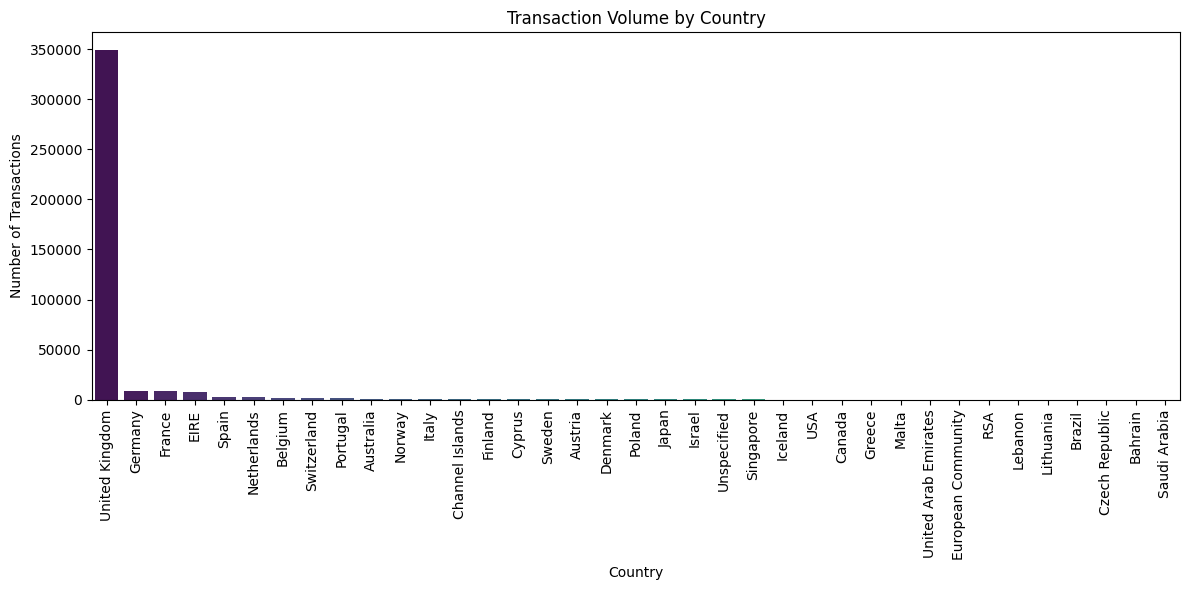

In [26]:
# Analyze transaction volume by country
plt.figure(figsize=(12,6))
country_counts = df['Country'].value_counts()
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis', hue=country_counts.index, legend=False)
plt.xticks(rotation=90)
plt.title('Transaction Volume by Country')
plt.ylabel('Number of Transactions')
plt.xlabel('Country')
plt.tight_layout()
plt.show()

### Reason for Choosing the Chart and Insights

#### Chart Choice:
- A **bar plot** was selected to clearly and effectively compare the number of transactions across different countries.
- Bar charts are ideal for categorical data like countries and allow easy visual comparison of transaction volumes.
- Using `viridis` palette enhances visual appeal and clarity by providing distinct colors.
- The x-axis labels are rotated 90° to improve readability given many country names.

#### Insights from the Chart:
- The chart reveals which countries contribute most to the transaction volume, highlighting key markets.
- Typically, the United Kingdom dominates transactions in this dataset, indicating a strong customer base there.
- Other countries show significantly fewer transactions, suggesting potential regions for targeted marketing or growth.
- It helps prioritize business efforts geographically based on transaction activity.
---

#### Chart 2: Identify top-selling products using **Bar Plot**

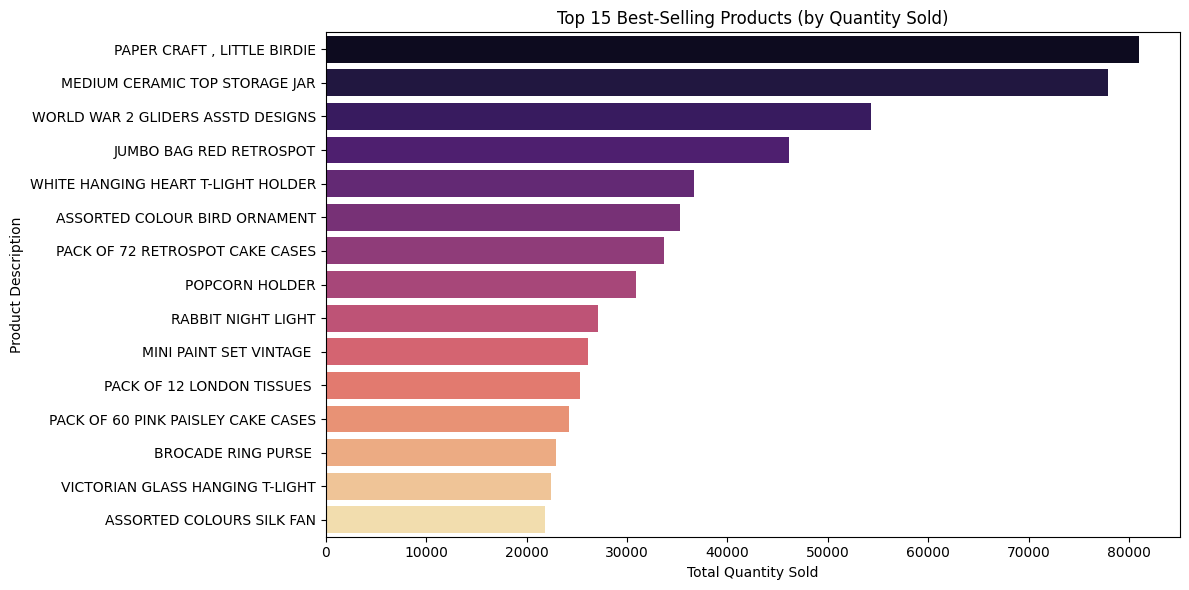

In [27]:
# Identify top 15 best-selling products
# Aggregate total quantity sold per product
top_products = df.groupby(['StockCode', 'Description'])['Quantity'].sum().sort_values(ascending=False).head(15)

# Extract products for plotting
y = top_products.index.get_level_values(1) # Product descriptions
y_hue = top_products.index.get_level_values(0)  # Stock codes

# Plot horizontal bar chart
plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=y, palette='magma', hue=y_hue, legend=False)
plt.title('Top 15 Best-Selling Products (by Quantity Sold)')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()

### Reason for Choosing the Chart and Insights

#### Chart Choice:
- A **horizontal bar chart** was chosen because it efficiently displays ranked data with long category labels (product names), making them easy to read.
- It allows clear comparison of product sales volume across multiple products.
- The heatmap-like `magma` palette enhances visual distinction among bars.

#### Insights from the Chart:
- The chart highlights the top 15 best-selling products by total quantity sold.
- It reveals which products dominate sales and likely contribute most to revenue.
- Identifies key products to focus on for inventory optimization or marketing.
- Shows a clear drop-off after top sellers, useful for understanding sales distribution.
---

#### Chart 3: Visualize purchase trends over time using a **line plot**.

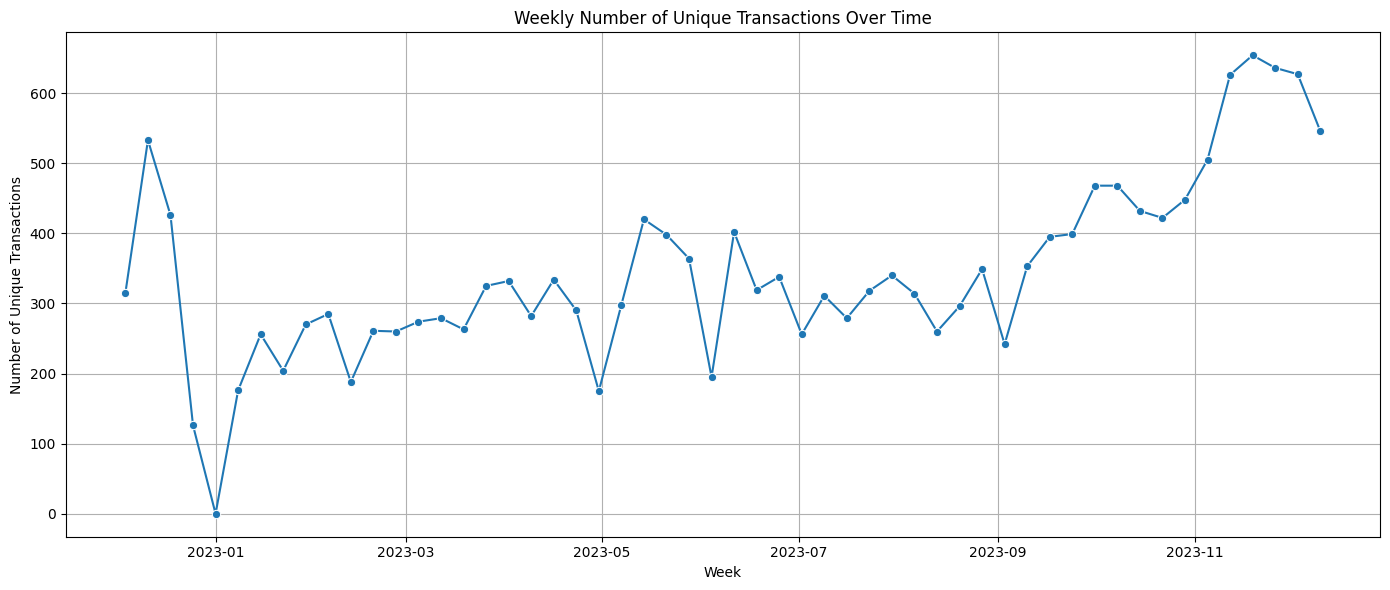

In [28]:
# Visualize transaction volume over time
# Ensure InvoiceDate is datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Aggregate number of unique invoices per week
weekly_transactions = df.groupby(pd.Grouper(key='InvoiceDate', freq='W'))['InvoiceNo'].nunique()

# Plot line chart
plt.figure(figsize=(14,6))
sns.lineplot(x=weekly_transactions.index, y=weekly_transactions.values, marker='o')
plt.title('Weekly Number of Unique Transactions Over Time')
plt.xlabel('Week')
plt.ylabel('Number of Unique Transactions')
plt.grid(True)
plt.tight_layout()
plt.show()

### Reason for Choosing the Chart and Insights

#### Chart Choice:
- A **line chart** is ideal for visualizing trends over time as it clearly shows how values evolve sequentially.
- Aggregating by week smooths daily noise and highlights broader purchase patterns.
- The use of markers improves visibility of data points, helping spot peaks and troughs easily.
- This chart effectively communicates the temporal dynamics of transaction volume, useful for spotting seasonality or growth.

#### Insights from the Chart:
- The chart reveals fluctuations in weekly transaction counts, indicating periods of increased or decreased customer activity.
- Peaks may correspond to promotional events, holidays, or sales periods, while dips highlight slower times.
- Overall trend direction (upward, downward, or stable) can inform business strategy on marketing and inventory.
---

### Chart 4: Inspect monetary distribution per transaction and customer using a **Histogram**

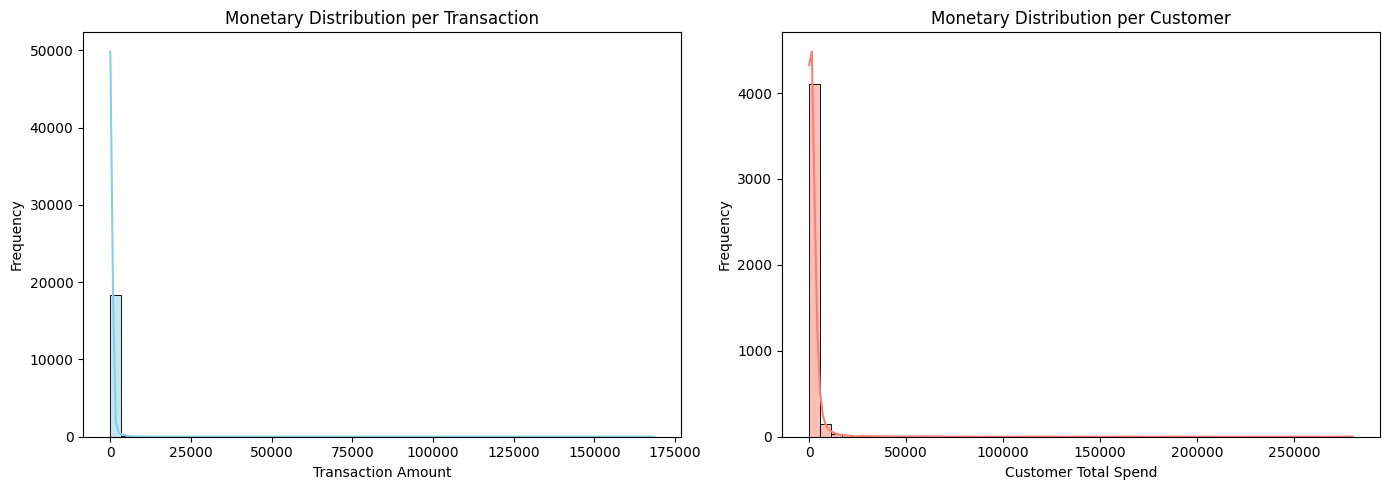

In [29]:
# Inspecting monetary value
# Calculate total price per row
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Monetary value per transaction
monetary_per_transaction = df.groupby('InvoiceNo')['TotalPrice'].sum().reset_index(name='Monetary')

# Monetary value per customer
monetary_per_customer = df.groupby('CustomerID')['TotalPrice'].sum().reset_index(name='Monetary')

# Plot histograms with KDE
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(monetary_per_transaction['Monetary'], kde=True, bins=50, color='skyblue', ax=axes[0])
axes[0].set_title('Monetary Distribution per Transaction')
axes[0].set_xlabel('Transaction Amount')
axes[0].set_ylabel('Frequency')

sns.histplot(monetary_per_customer['Monetary'], kde=True, bins=50, color='salmon', ax=axes[1])
axes[1].set_title('Monetary Distribution per Customer')
axes[1].set_xlabel('Customer Total Spend')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Reason for Choosing the Chart and Insights

#### Chart Choice:  
Histograms with KDE (Kernel Density Estimate) effectively show both the distribution shape and density of monetary values.  
- **Histogram:** Visualizes frequency counts of monetary values in defined bins, helping identify common value ranges and outliers.  
- **KDE:** Smooths the distribution curve for better understanding of data density and modality.

Using side-by-side plots for transactions and customers enables comparison of spending behavior at two levels: individual purchases vs. aggregate customer spending.

#### Insights from the Chart:  
- **Monetary per Transaction:**  
  Shows a right-skewed distribution with most transactions having relatively low to moderate amounts, but a few with very high values indicating occasional large purchases.  
- **Monetary per Customer:**  
  Also right-skewed, with most customers spending moderately overall, while a small segment is responsible for significantly higher total spend (potential high-value customers).  
---

#### Chart 5: Product recommendation heatmap / similarity matrix using **Heatmap**

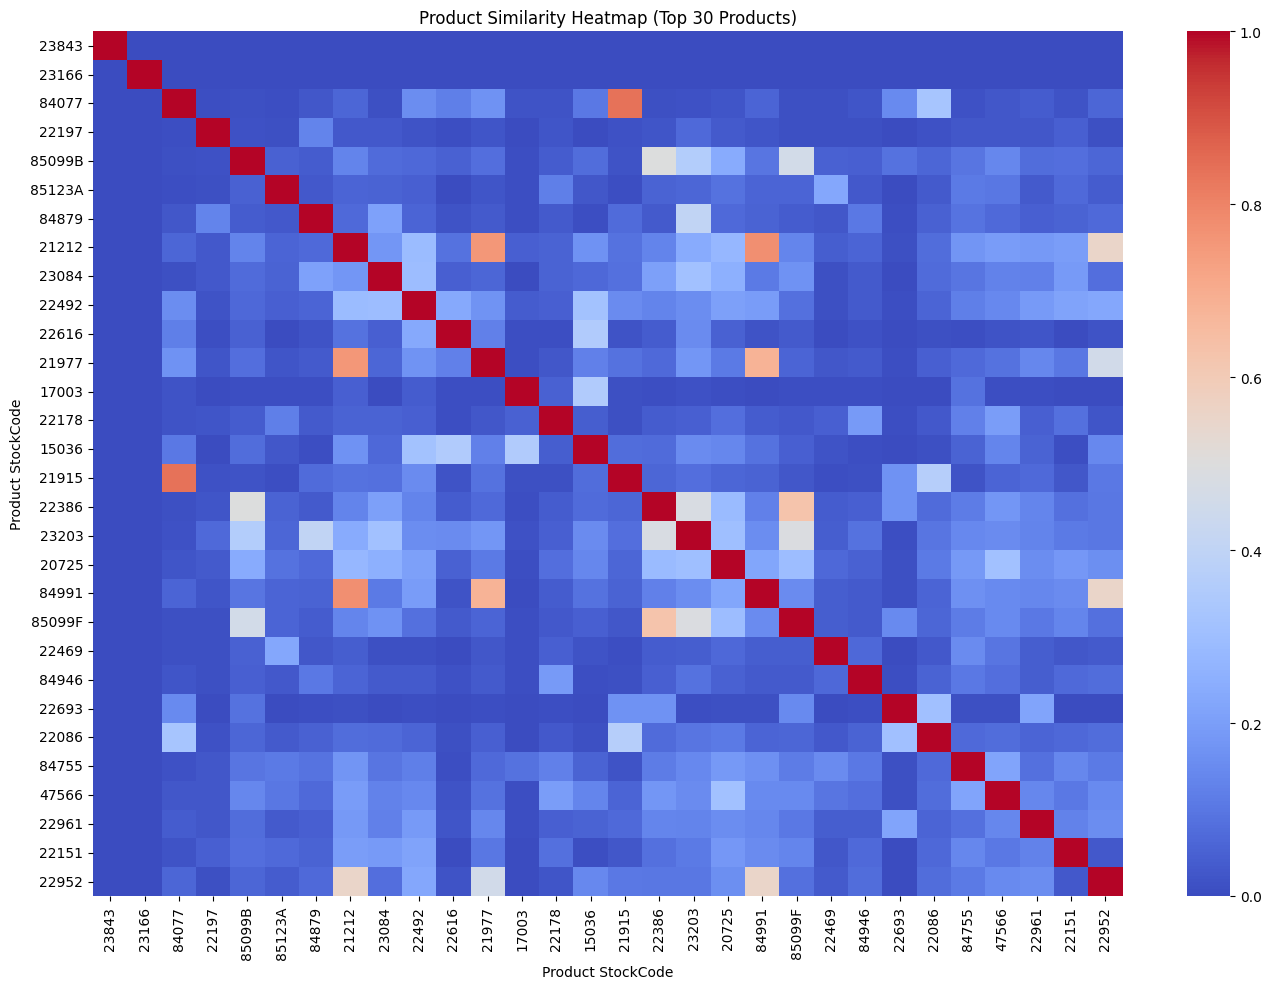

In [30]:
# 6. Visualize clusters by Frequency vs Monetary w/ segment label
# Assume `df` is your cleaned DataFrame with columns:
# ['CustomerID', 'StockCode', 'Quantity']

# 1. Create Customer-Product matrix (rows = customers, columns = products)
basket = pd.pivot_table(df, index='CustomerID', columns='StockCode', 
                        values='Quantity', fill_value=0)

# 2. Calculate cosine similarity between products (columns)
product_similarity = cosine_similarity(basket.T)

# 3. Convert similarity matrix to DataFrame for easier handling
product_sim_df = pd.DataFrame(product_similarity, index=basket.columns, columns=basket.columns)

# 4. Optional: Select top-N popular products to visualize heatmap (e.g., top 30)
top_products = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(30).index
subset_sim_df = product_sim_df.loc[top_products, top_products]

# 5. Plot heatmap of product similarity
plt.figure(figsize=(14, 10))
sns.heatmap(subset_sim_df, cmap='coolwarm', xticklabels=True, yticklabels=True)
plt.title('Product Similarity Heatmap (Top 30 Products)')
plt.xlabel('Product StockCode')
plt.ylabel('Product StockCode')
plt.tight_layout()
plt.show()

#### Product Recommendation Heatmap / Similarity Matrix 🔥

**Overview:**

Cosine similarity quantifies how similar two products are based on their purchase patterns by customers. Calculating pairwise cosine similarity between products creates a similarity matrix, which can be visualized as a heatmap to help understand product relationships and aid in recommendations.

#### Steps and Explanation:

1. **Create Customer-Product Matrix**  
   Construct a matrix where rows represent customers, columns represent products (StockCode), and values are purchase quantities (or ratings).

2. **Calculate Cosine Similarity Matrix**  
   Use sklearn’s `cosine_similarity` on the transposed customer-product matrix (products as rows, customers as features) to get product-to-product similarity scores.

3. **Visualize with Heatmap**  
   Plot the similarity matrix as a heatmap using seaborn, typically focusing on a subset of popular products for clarity.

#### Interpretation:
- The heatmap cells indicate similarity scores between two products (values between 0 and 1).
- Warmer colors (towards 1) mean higher similarity — products often bought by the same customers.
- Cooler colors (closer to 0) indicate low similarity — products purchased by different customer groups.
- This visualization helps identify product pairs to recommend together or segment products based on customer co-purchase patterns.

---

### ***3. Clustering Methodology***


#### 1. Feature Engineering: RFM Metrics 🚀

#### What Are RFM Metrics?
- **Recency (R):** How recently a customer made their last purchase.
- **Frequency (F):** How often a customer makes purchases.
- **Monetary (M):** How much money a customer spends in total.

#### How to Calculate RFM Features

1. **Recency**
   - Formula:  
     `Recency = Latest purchase date in dataset - Customer’s last purchase date`
   - **Purpose:** Lower recency value means the customer purchased more recently—indicative of more engaged customers.
2. **Frequency**
   - Formula:  
     `Frequency = Number of unique transactions (invoices) per customer`
   - **Purpose:** Higher frequency means the customer buys more often, signaling loyalty.
3. **Monetary**
   - Formula:  
     `Monetary = Total amount spent by each customer`
     (Sum of all purchases: `Monetary = sum(Quantity × UnitPrice)` per customer)
   - **Purpose:** Higher monetary value signals high-value customers.

In [31]:
# Calculate RFM metrics
# Assume your preprocessed DataFrame is `df`, and dates are converted, etc.

# 1. Calculate 'TotalPrice' per row
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# 2. Set the snapshot (latest) date for RFM calculation
snapshot_date = df['InvoiceDate'].max() + timedelta(days=1)

# 3. Aggregate RFM per customer
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,   # Recency
    'InvoiceNo': 'nunique',                                    # Frequency
    'TotalPrice': 'sum'                                        # Monetary
}).reset_index()

# 4. Rename columns for clarity
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# RFM dataset first view
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40



#### Why Do This?
- **Transforms raw transaction data** into actionable features for customer segmentation and modeling.
- **Foundation for clustering** (e.g., KMeans) and data-driven marketing strategies.

---
RFM feature engineering provides a structured, interpretable way to rank and segment customers by engagement, loyalty, and value to your business.

#### Chart: RFM distributions using a ***Histogram***

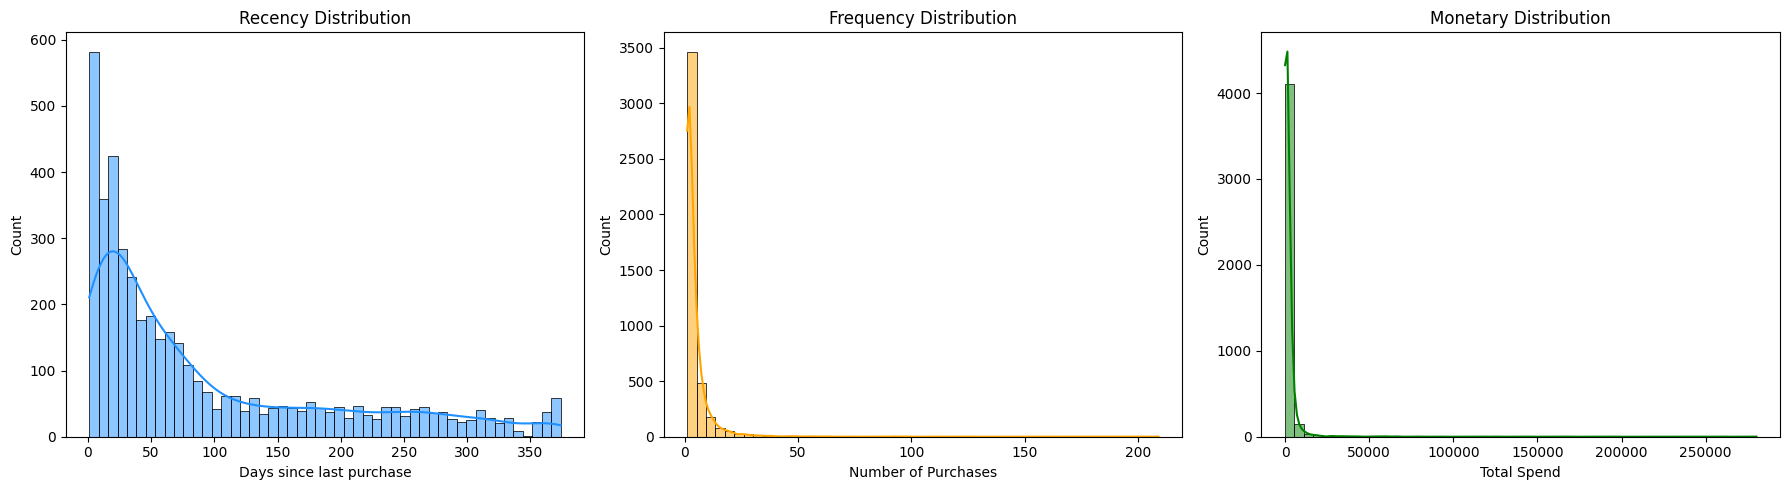

In [32]:
# Visualize RFM distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Recency
sns.histplot(rfm['Recency'], bins=50, kde=True, color='dodgerblue', ax=axes[0])
axes[0].set_title('Recency Distribution')
axes[0].set_xlabel('Days since last purchase')

# Frequency
sns.histplot(rfm['Frequency'], bins=50, kde=True, color='orange', ax=axes[1])
axes[1].set_title('Frequency Distribution')
axes[1].set_xlabel('Number of Purchases')

# Monetary
sns.histplot(rfm['Monetary'], bins=50, kde=True, color='green', ax=axes[2])
axes[2].set_title('Monetary Distribution')
axes[2].set_xlabel('Total Spend')

plt.tight_layout()
plt.show()

#### RFM Distributions Analysis 📊

#### Why This Chart Was Selected  
Histograms with KDE (Kernel Density Estimate) clearly display the distribution shape, spread, and skewness of each RFM variable while smoothing the visualization for patterns. This helps to understand customer purchase behavior across:

- **Recency:** How recently customers made their last purchase.
- **Frequency:** How often customers make purchases.
- **Monetary:** How much customers typically spend.

#### Key Insights from the Charts  
- **Recency:** Most customers made recent purchases with a long right tail, indicating some inactive or less recent buyers.  
- **Frequency:** The distribution is heavily right-skewed, showing many customers purchase infrequently, with a smaller group being frequent buyers.  
- **Monetary:** Also right-skewed; most customers spend modestly, but a few are high spenders, highlighting valuable segments.

These insights guide targeted marketing, customer retention strategies, and identify potential high-value customers.

---

#### 2. Standardize/Normalize the RFM values

In [33]:
# Standardize RFM features
# Assuming your RFM dataframe is named `rfm` with columns: 'Recency', 'Frequency', 'Monetary'

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the RFM features
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Convert back to a DataFrame for convenience
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled'])

# Optionally, concatenate with CustomerID for reference
rfm_scaled_df = pd.concat([rfm['CustomerID'], rfm_scaled_df], axis=1)

# Display the first few rows
print(rfm_scaled_df.head())

  CustomerID  Recency_scaled  Frequency_scaled  Monetary_scaled
0    12346.0        2.334574         -0.425097         8.363010
1    12347.0       -0.905340          0.354417         0.251699
2    12348.0       -0.175360         -0.035340        -0.027988
3    12349.0       -0.735345         -0.425097        -0.032406
4    12350.0        2.174578         -0.425097        -0.190812


In [34]:
# Saving the scaled RFM dataframe to pkl
joblib.dump(scaler, 'rfm_scaled.pkl')

['rfm_scaled.pkl']

#### ⚙️ Standardizing/Normalizing RFM Values 

#### What is Standardizing/Normalizing?  
- **Standardizing** transforms data to have a mean of zero and a standard deviation of one, adjusting values based on their distribution.  
- **Normalizing** rescales data to a specific range, typically 0 to 1, to ensure consistent scale across features. Both techniques make data comparable and suitable for machine learning algorithms.

#### Why Standardize/Normalize RFM Values?  
- The RFM metrics (Recency, Frequency, Monetary) have different units and scales — for example, Recency is in days, Frequency is a count, and Monetary is currency amount.  
- Without scaling, larger magnitude features (often Monetary) could dominate models like clustering, leading to biased segmentation.  
- Standardizing/normalizing ensures that each RFM feature contributes equally to distance calculations and model training, improving the quality and fairness of customer segmentation.

#### Method Used  
- Typically, **StandardScaler** from scikit-learn is used for RFM data to standardize features by removing the mean and scaling to unit variance.  
- This method preserves the data distribution shape while equalizing scales, which is ideal for clustering algorithms like K-Means.  
- Alternatively, Min-Max normalization can be used to rescale values between 0 and 1, especially when the model or visualization prefers bounded inputs.
---

#### 3. Clustering Algorithm:

**KMeans Clustering**

Use Elbow Method , Silhouette Score to decide the number of clusters

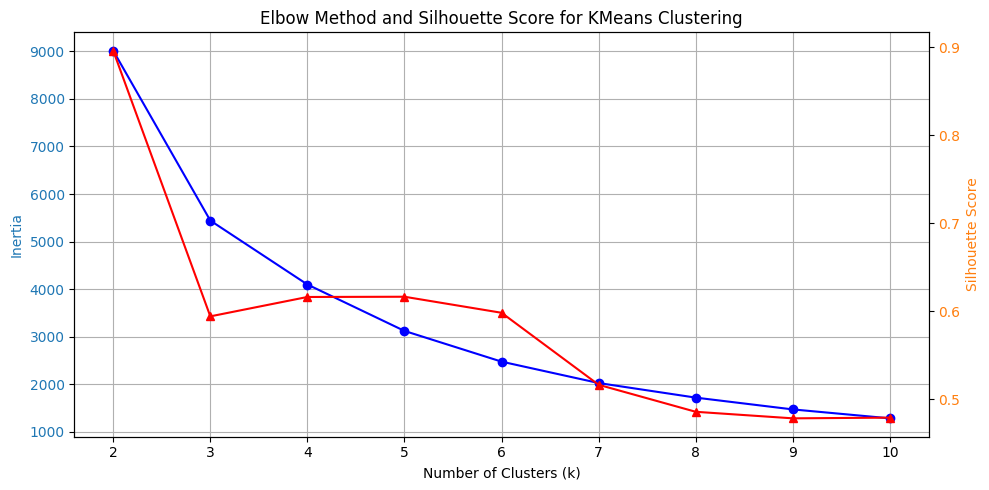

In [35]:
# Assume `rfm` DataFrame is ready with columns: 'CustomerID', 'Recency', 'Frequency', 'Monetary'
# 1. Elbow Method to find optimal number of clusters
inertia = []
silhouette = []
K_range = range(2, 11)  # trying 2 to 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(rfm_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(rfm_scaled, cluster_labels))

# Plot Elbow curve and Silhouette scores
fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:blue'
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(K_range, inertia, 'bo-', label='Inertia')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(K_range, silhouette, 'r^-', label='Silhouette Score')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Elbow Method and Silhouette Score for KMeans Clustering')
fig.tight_layout()
plt.show()

#### Deciding Number of Clusters: Elbow Method & Silhouette Score 🔍

#### Elbow Method  
- It analyzes the **Within-Cluster Sum of Squares (inertia)** as the number of clusters (k) increases.  
- Plotting inertia versus k shows a curve that usually sharply drops and then flattens — the “elbow” point indicates the optimal k where adding more clusters offers diminishing returns.  
- It is an intuitive and easy technique to identify suitable cluster count by visual inspection.

#### Silhouette Score  
- Measures how well-separated clusters are by comparing the average distance between points in the same cluster to points in other clusters.  
- Scores range from -1 to 1, where a higher score indicates better-defined and well-separated clusters.  
- By computing silhouette scores for varying k, you can select the k with the highest average score, indicating optimal cluster separation.

**Why Use Both?**
- The Elbow Method focuses on compactness (inertia), while Silhouette Score focuses on cluster separation and cohesion.  
- Using both together provides complementary insight for a robust choice of cluster number.

#### Elbow Method Result  
- The Elbow curve plots the Within-Cluster Sum of Squares (inertia) against different cluster counts (k).  
- The "elbow" point is where the decrease in inertia starts to level off, indicating diminishing returns on clustering quality by adding more clusters.  
- In this analysis, the elbow is observed at **k = 4**, suggesting that 4 clusters balance compactness and simplicity well.

#### Silhouette Score Result  
- Silhouette scores measure how well-separated clusters are, with values closer to 1 indicating better-defined clusters.  
- The average silhouette score was highest and stable around **k = 4**, confirming that 4 clusters provide the most meaningful segmentation.
---

Run Clustering

In [36]:
# 2. Choose k = 4 based on elbow and silhouette analysis
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# 3. Map clusters to customer segments based on business logic:
# # High R, High F, High M - High value
# # Medium F, Medium M - Regular
# # Low F, Low M, older R - Occasional
# # High R, Low F, Low M - At-Risk

# To assign segments, let's inspect cluster centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=['Recency', 'Frequency', 'Monetary'])
print("Cluster centroids (original scale):")
print(centroids_df)

Cluster centroids (original scale):
      Recency  Frequency       Monetary
0   43.702685   3.682711    1353.625312
1  248.075914   1.552015     478.848773
2    7.384615  82.538462  127187.959231
3   15.500000  22.333333   12690.500392


In [37]:
# Ordering clusters by business rules (high/medium/low Recency/Frequency/Monetary):
# Usually:
# - Low Recency (recent purchase) = good, so "High R" in your labels means something else? 
#   Here "High R" means large recency = longer time since last purchase => "At-Risk"
# We'll assign as per: 
#   High value = low Recency, high Frequency, high Monetary
#   Regular = medium Frequency and Monetary, moderate Recency
#   Occasional = low Frequency and Monetary, older Recency (high Recency)
#   At-Risk = high Recency, low Frequency, low Monetary

# So we will identify clusters by centroid patterns

# For example:
# Let's assign labels based on centroids:
# Find cluster with lowest Recency and highest Frequency & Monetary → 'High-Value'
# Find cluster with highest Recency, low Frequency & Monetary → 'At-Risk'
# Others accordingly

cluster_summary = centroids_df.copy()
cluster_summary['Cluster'] = cluster_summary.index

In [38]:
# Assign labels:
def assign_segment(row, centroids_df):
    recency = row['Recency']
    frequency = row['Frequency']
    monetary = row['Monetary']
    # Based on centroids, we map clusters to segments
    # We'll do it programmatically:
    # Find the cluster with min Recency & max Frequency & max Monetary as High-Value
    # Find cluster with max Recency & min F & min M as At-Risk
    # Others to Regular / Occasional based on F & M medium / low
    min_rec_cluster = centroids_df['Recency'].idxmin()
    max_rec_cluster = centroids_df['Recency'].idxmax()
    max_f_cluster = centroids_df['Frequency'].idxmax()
    max_m_cluster = centroids_df['Monetary'].idxmax()
    min_f_cluster = centroids_df['Frequency'].idxmin()
    min_m_cluster = centroids_df['Monetary'].idxmin()

    if row['Cluster'] == min_rec_cluster:
        return 'High-Value'  # Recently purchased with high F & M
    elif row['Cluster'] == max_rec_cluster:
        return 'At-Risk'     # Old buyers, low F & M
    else:
        # Check if frequency and monetary are around medium values
        med_freq = centroids_df['Frequency'].median()
        med_monetary = centroids_df['Monetary'].median()
        c_freq = centroids_df.loc[row['Cluster'], 'Frequency']
        c_monetary = centroids_df.loc[row['Cluster'], 'Monetary']
        if c_freq >= med_freq and c_monetary >= med_monetary:
            return 'Regular'
        else:
            return 'Occasional'

rfm['Segment'] = rfm.apply(lambda row: assign_segment(row, centroids_df), axis=1)
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Cluster,Segment
0,12346.0,326,1,77183.60,3,Regular
1,12347.0,2,7,4310.00,0,Occasional
2,12348.0,75,4,1797.24,0,Occasional
3,12349.0,19,1,1757.55,0,Occasional
4,12350.0,310,1,334.40,1,At-Risk


In [39]:
# Saving Segmented RFM dataframe to csv
rfm.to_csv('rfm_segmented.csv', index=False)

 Visualize the clusters using a scatter plot or 3D plot of RFM scores.

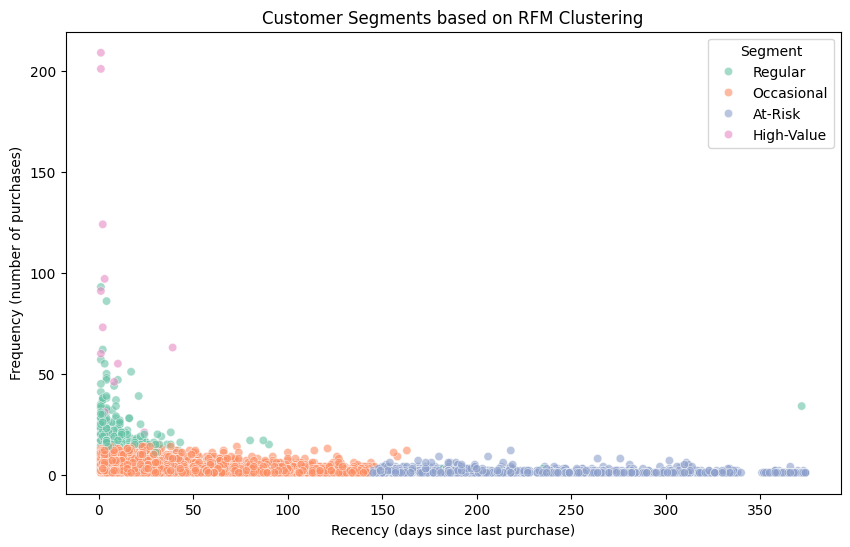

In [40]:
# 5. Visualize clusters by Recency vs Frequency w/ segment label
plt.figure(figsize=(10,6))
sns.scatterplot(x='Recency', y='Frequency', hue='Segment', data=rfm, palette='Set2', alpha=0.6)
plt.title('Customer Segments based on RFM Clustering')
plt.xlabel('Recency (days since last purchase)')
plt.ylabel('Frequency (number of purchases)')
plt.legend(title='Segment')
plt.show()

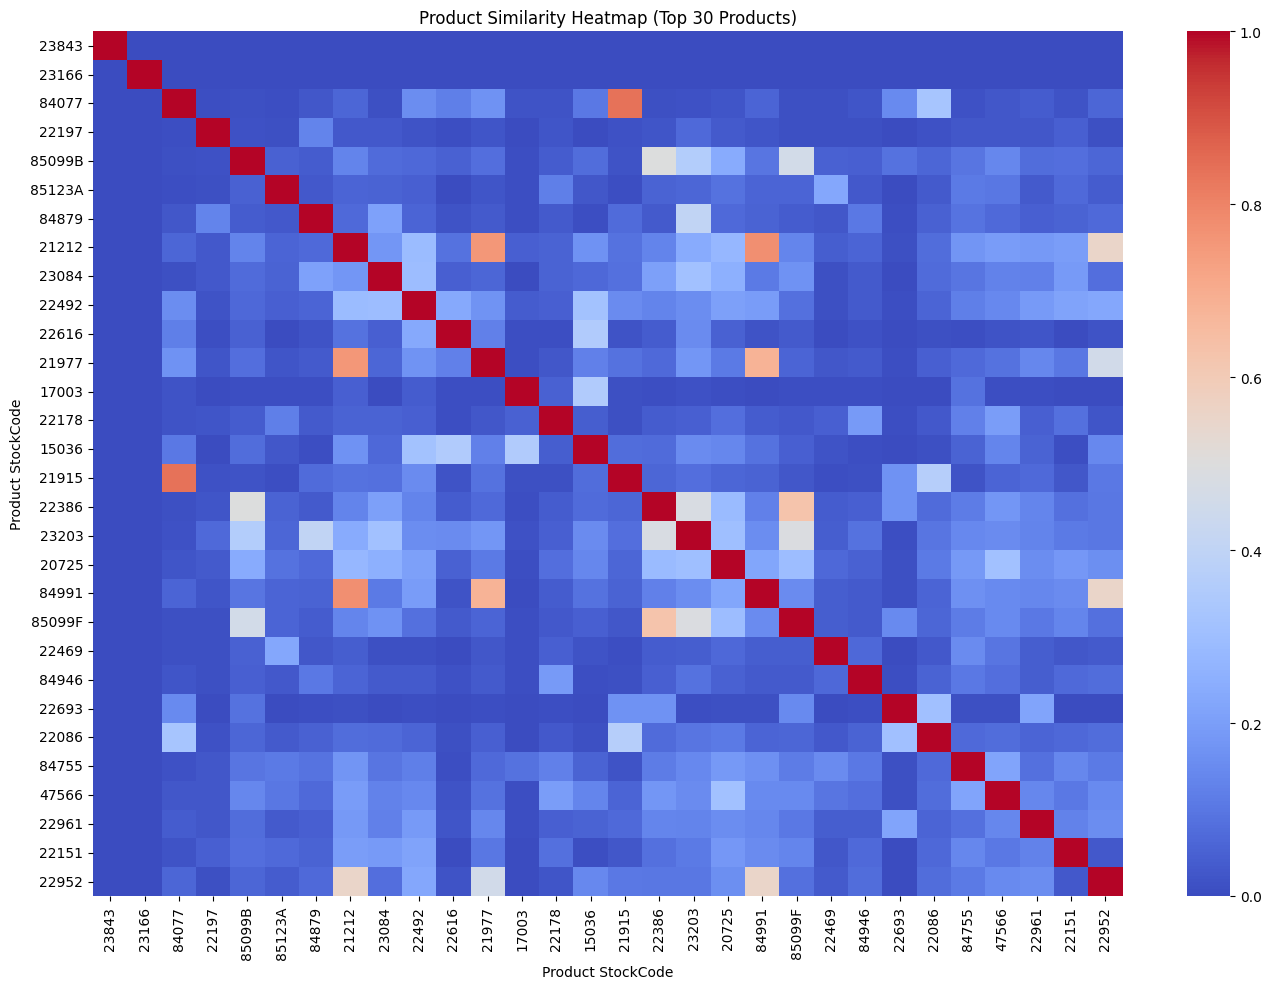

In [41]:
# 6. Visualize clusters by Frequency vs Monetary w/ segment label
# Assume `df` is your cleaned DataFrame with columns:
# ['CustomerID', 'StockCode', 'Quantity']

# 1. Create Customer-Product matrix (rows = customers, columns = products)
basket = pd.pivot_table(df, index='CustomerID', columns='StockCode', 
                        values='Quantity', fill_value=0)

# 2. Calculate cosine similarity between products (columns)
product_similarity = cosine_similarity(basket.T)

# 3. Convert similarity matrix to DataFrame for easier handling
product_sim_df = pd.DataFrame(product_similarity, index=basket.columns, columns=basket.columns)

# 4. Optional: Select top-N popular products to visualize heatmap (e.g., top 30)
top_products = df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(30).index
subset_sim_df = product_sim_df.loc[top_products, top_products]

# 5. Plot heatmap of product similarity
plt.figure(figsize=(14, 10))
sns.heatmap(subset_sim_df, cmap='coolwarm', xticklabels=True, yticklabels=True)
plt.title('Product Similarity Heatmap (Top 30 Products)')
plt.xlabel('Product StockCode')
plt.ylabel('Product StockCode')
plt.tight_layout()
plt.show()

In [42]:
# Saving product similarity dataframe to pkl
product_sim_df.to_pickle('product_similarity.pkl')

In [43]:
# Assuming your cleaned dataframe is `df` with columns 'StockCode' and 'Description'
stockcode_description = df[['StockCode', 'Description']].drop_duplicates()

# Save mapping as CSV or pickle for later loading
stockcode_description.to_pickle('product_mapping.pkl')
# or
# stockcode_description.to_csv('product_mapping.csv', index=False)

In [44]:
# Saving model
joblib.dump(kmeans, 'rfm_kmeans.pkl')

['rfm_kmeans.pkl']

#### Customer Segments Visualization for K-Means Clustering

This scatter plot visualizes customer segments based on **RFM (Recency, Frequency, Monetary)** clustering results.

#### Plot Details:

- **X-axis**: Recency (days since last purchase)
- **Y-axis**: Frequency (number of purchases)
- **Color-coded Segments**:
  - 🟢 **Regular**: Consistent buyers with moderate recency and frequency
  - 🟠 **Occasional**: Customers with sporadic purchases and moderate recency
  - 🔵 **At-Risk**: Haven’t purchased in a long time (high recency)
  - 🟣 **High-Value**: Very recent and frequent buyers — top tier customers

#### Interpretation:

- **High-Value Customers (🟣)**:
  - Located in the **bottom-left** corner (low recency, high frequency)
  - These are **your most engaged and loyal customers**
  - Action: Reward with loyalty programs and exclusive deals

- **Regular Customers (🟢)**:
  - Moderate frequency and relatively low recency
  - Represent consistent, reliable buyers
  - Action: Maintain interest with periodic offers

- **Occasional Customers (🟠)**:
  - Spread around mid-recency and low-to-mid frequency
  - Potential to convert into regulars through targeted marketing
  - Action: Increase purchase frequency through timely promotions

- **At-Risk Customers (🔵)**:
  - Located far to the right (high recency)
  - These customers have **not purchased in a long time** and need re-engagement efforts
  - Action: Use win-back campaigns or surveys to understand drop-off

#### Insights:

- **Cluster distribution** is logical, with High-Value customers tightly grouped in the lower-left (recent + frequent), and At-Risk customers spread along the high-recency axis.
- The segmentation provides a strong foundation for **personalized marketing strategies** and **lifecycle-based engagement**.
---

### **DBScan Clustering**

Use Elbow Method , Silhouette Score to decide the number of clusters

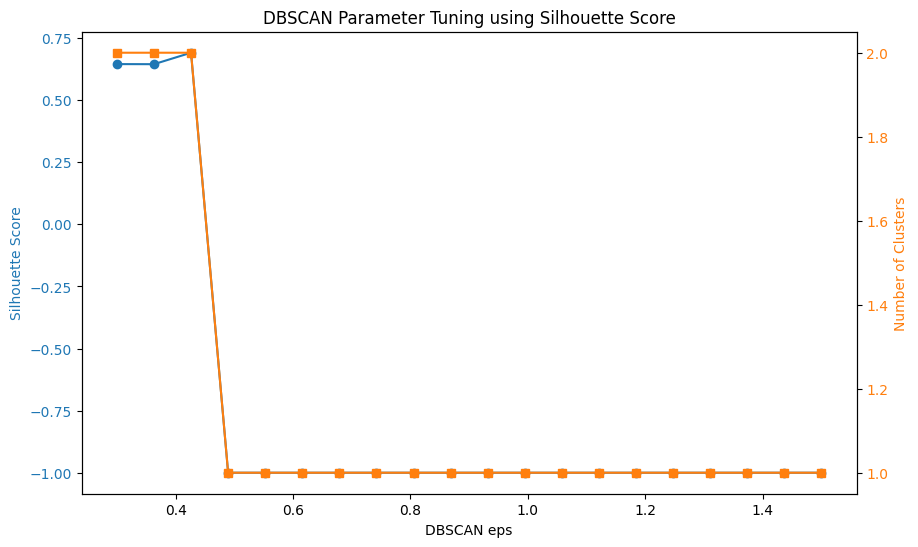

In [45]:
# Assume `rfm` DataFrame is ready with columns ['Recency', 'Frequency', 'Monetary']
# 1. Use Silhouette Scores and DBSCAN with different eps to find best clusters
# Silhouette score is not well-defined if only 1 cluster/noise; handle carefully
eps_values = np.linspace(0.3, 1.5, 20)
silhouette_scores = []
n_clusters_list = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(rfm_scaled)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Exclude noise (-1)
    n_clusters_list.append(n_clusters)
    
    if n_clusters > 1:
        score = silhouette_score(rfm_scaled, labels)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(-1)  # Invalid silhouette score


# Plot Silhouette score and number of clusters by eps
fig, ax1 = plt.subplots(figsize=(10,6))

color = 'tab:blue'
ax1.set_xlabel('DBSCAN eps')
ax1.set_ylabel('Silhouette Score', color=color)
ax1.plot(eps_values, silhouette_scores, 'o-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Number of Clusters', color=color)
ax2.plot(eps_values, n_clusters_list, 's-', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('DBSCAN Parameter Tuning using Silhouette Score')
plt.show()

#### 📊 DBSCAN Analysis using Silhouette Score & Elbow Method

This analysis helps identify the optimal `eps` value for DBSCAN clustering using both the **Silhouette Score** and an **Elbow-like method** based on the number of clusters.

#### 🔍 Observations from the Plot:

- **Silhouette Score (blue line)**:
  - High values (~0.65–0.70) for `eps` between **0.3 and 0.45**
  - Drops sharply to **-1.0** after `eps = 0.45`, indicating all points are either noise or in a single cluster (not meaningful)

- **Number of Clusters (orange line)**:
  - Consistently **2 clusters** for `eps = 0.3 to 0.45`
  - Drops to **1 cluster** at `eps >= 0.5`, which is not useful for clustering

#### ✅ Conclusion Using Elbow Method and Silhouette Score:

- **Optimal `eps` range**: `0.3` to `0.45`
  - This is the **"elbow point"** where performance begins to degrade
- **Optimal number of clusters**: `2`
  - Stable clustering with high Silhouette Score before degradation
- **Recommended `eps` value**: Choose a value in the range **[0.3, 0.45]** — ideally the one with the highest Silhouette Score within this interval

#### 📌 Final Recommendation:

- **Use `eps` ≈ `0.4`**
- **Expected clusters**: `2`
- **Rationale**:
  - Balances a high Silhouette Score with meaningful cluster separation
  - Avoids overgeneralization into one large cluster
  ---

Run Clustering

In [46]:
# 2. Cluster using DBSCAN with best eps
dbscan_final = DBSCAN(eps=0.4, min_samples=5)
labels_final = dbscan_final.fit_predict(rfm_scaled)
rfm['Cluster'] = labels_final

Visualize the clusters using a scatter plot or 3D plot of RFM scores

In [47]:
# 3. Map clusters to segments (example logic)
def label_segment(row):
    if row.Cluster == -1:
        return 'Noise/Outlier'
    # Using R, F, M scaled values roughly to define clusters
    r, f, m = rfm_scaled[row.name]  # row.name is index
    if (r < -0.5) and (f > 0.5) and (m > 0.5):
        return 'High Value'       # Low Recency (recent), High F, High M
    elif (f > -0.5) and (m > -0.5):
        return 'Regular'          # Medium Frequency & Monetary
    elif (f < -0.5) and (m < -0.5) and (r > 0.5):
        return 'Occasional'       # Low F & M, Older Recency
    elif (r > 0.5) and (f < -0.5) and (m < -0.5):
        return 'At Risk'          # High Recency (old), Low F & M
    else:
        return 'Other'

rfm['Segment'] = rfm.apply(label_segment, axis=1)

# 4. Quick count of customers per segment
print(rfm['Segment'].value_counts())

Segment
Regular          4169
High Value         96
Noise/Outlier      73
Name: count, dtype: int64


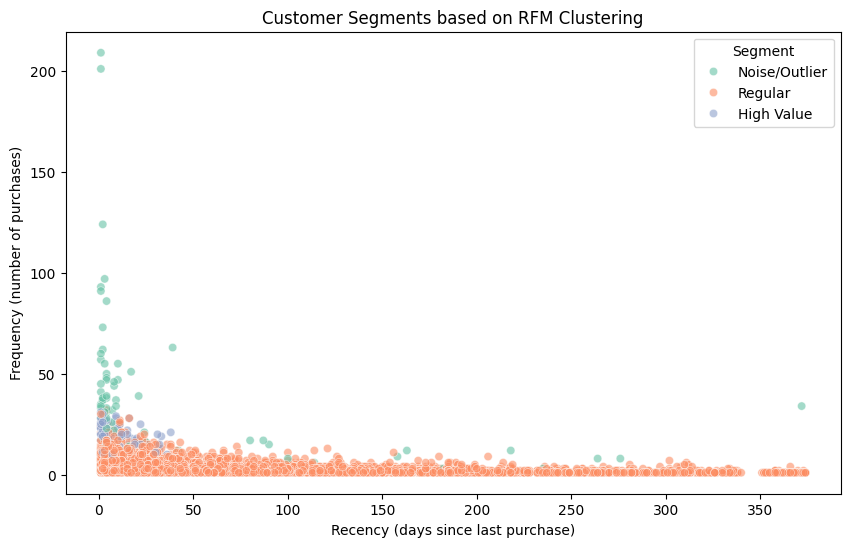

In [48]:
# 5. Visualize clusters by Recency vs Frequency w/ segment label
plt.figure(figsize=(10,6))
sns.scatterplot(x='Recency', y='Frequency', hue='Segment', data=rfm, palette='Set2', alpha=0.6)
plt.title('Customer Segments based on RFM Clustering')
plt.xlabel('Recency (days since last purchase)')
plt.ylabel('Frequency (number of purchases)')
plt.legend(title='Segment')
plt.show()

In [49]:
# Saving model
joblib.dump(kmeans, 'rfm_dbscan.pkl')

['rfm_dbscan.pkl']

#### Customer Segments Visualization for DBscan Clustering

This scatter plot visualizes customer segments based on **RFM (Recency, Frequency, Monetary)** clustering.

#### Plot Details:

- **X-axis**: Recency (days since last purchase)
- **Y-axis**: Frequency (number of purchases)
- **Color Legend**:
  - 🟢 **Noise/Outlier**: Customers that don’t belong clearly to any segment (potential anomalies)
  - 🟠 **Regular**: The majority of customers with moderate purchase behavior
  - 🔵 **High Value**: Loyal customers who purchase frequently and recently

#### Interpretation:

- **High Value Customers (🔵)**:
  - Appear clustered at the **lower-left** region (low recency, high frequency)
  - These are **recent and frequent buyers** — ideal for loyalty programs or upselling

- **Regular Customers (🟠)**:
  - Spread out across the middle of the plot
  - Moderate recency and frequency — potential to nurture into high-value customers

- **Noise/Outliers (🟢)**:
  - Scattered across the plot, including some with very high frequency or very long recency
  - These might be **anomalies, edge cases, or one-time large spenders**

#### Visual Insights:

- **High-Value Customers (🔵)** appear tightly clustered in the **bottom-left** — frequent, recent buyers.
- **Regular Customers (🟠)** form the bulk of the middle region — common and stable buying patterns.
- **Outliers (🟢)** are dispersed throughout, including those with very high frequency or long recency — some may be noise or niche customer types.

#### Strategic Takeaways:

- The segmentation is effective for identifying **customer loyalty tiers**
- **High-Value** and **Regular** segments represent strong business value
- The **Outlier segment** may contain:
  - Unique use cases worth exploring
  - Data quality issues
  - Customers with unpredictable or experimental purchasing behavior

---

### **Hierarchial Clustering**

Use Elbow Method , Silhouette Score to decide the number of clusters

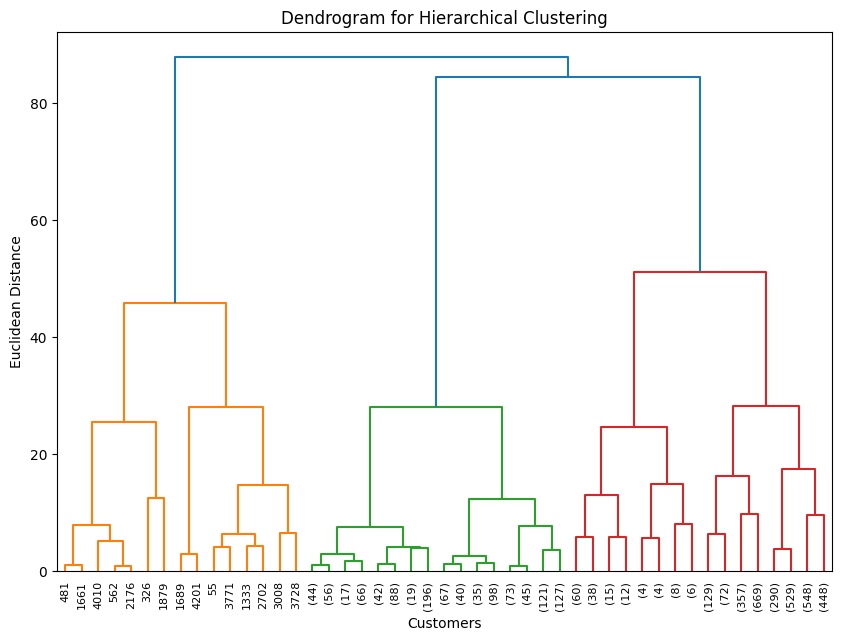

In [50]:
# Elbow method and silhouette score for Hierarchical Clustering
# Step 1: Use hierarchical clustering linkage to plot dendrogram for choosing clusters
linked = linkage(rfm_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

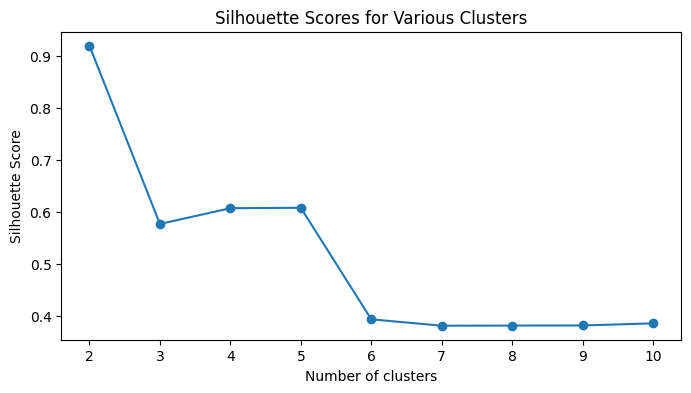

In [51]:
# Step 2: Use silhouette score to help decide number of clusters
sil_scores = []
range_n_clusters = range(2, 11)
for n_clusters in range_n_clusters:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters,metric='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(rfm_scaled)
    silhouette_avg = silhouette_score(rfm_scaled, cluster_labels)
    sil_scores.append(silhouette_avg)

plt.figure(figsize=(8,4))
plt.plot(range_n_clusters, sil_scores, marker='o')
plt.title('Silhouette Scores for Various Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

#### 📊 Hierarchical Clustering: Optimal Number of Clusters

We can use both the **Dendrogram** and **Silhouette Score** to determine the ideal number of clusters for our hierarchical clustering.

#### **Dendrogram Interpretation:**

- The **Dendrogram** reveals the hierarchical structure of the clusters based on Euclidean distance.
- **Optimal number of clusters** can be determined by observing the **largest vertical distance** before any clusters merge.

- **Key Observation**:
  - From the Dendrogram, we can see a significant gap at a height of around **40**. This suggests that **3 clusters** would be a reasonable choice.
  - Clusters above this threshold have less cohesion, indicating fewer, well-separated groups.

#### **Silhouette Score Analysis:**

- The **Silhouette Score** measures the quality of the clustering, ranging from **-1** (poor clustering) to **+1** (well-defined clusters).
- A higher Silhouette Score indicates well-separated and well-formed clusters.

- **Key Observation**:
  - The **highest Silhouette Score** is achieved with **2 clusters**, but there is a sharp **drop after 2**, suggesting that increasing the number of clusters beyond 2 significantly reduces the clustering quality.
  - After this, the score plateaus, indicating that adding more clusters results in less effective grouping.

#### **Conclusion:**

- **Dendrogram** suggests **3 clusters** are appropriate, as indicated by the large distance between cluster merges.
- **Silhouette Score** suggests **2 clusters** have the best quality based on the score.

#### **Final Recommendation**:
- Given that the Dendrogram suggests 3 clusters and the Silhouette Score strongly favors 2 clusters, it may be prudent to:
  - **Start with 2 clusters** for simplicity and clarity, and
  - Consider **3 clusters** if additional granularity in customer segmentation is desired.
  
---

Run Clustering

In [52]:
# Step 4: Run hierarchical clustering with chosen number of clusters (2)
n_clusters = 2
hc = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
rfm['Cluster'] = hc.fit_predict(rfm_scaled)

In [53]:
# Step 5: Define segment labels based on RFM intuition
def segment_label(row):
    if row['Recency'] <= rfm['Recency'].quantile(0.25) and row['Frequency'] >= rfm['Frequency'].quantile(0.75) and row['Monetary'] >= rfm['Monetary'].quantile(0.75):
        return 'High Value'  # High R, High F, High M
    elif row['Frequency'] >= rfm['Frequency'].quantile(0.4) and row['Frequency'] <= rfm['Frequency'].quantile(0.75) and row['Monetary'] >= rfm['Monetary'].quantile(0.4) and row['Monetary'] <= rfm['Monetary'].quantile(0.75):
        return 'Regular'    # Medium F, Medium M
    elif row['Recency'] >= rfm['Recency'].quantile(0.75) and row['Frequency'] <= rfm['Frequency'].quantile(0.4) and row['Monetary'] <= rfm['Monetary'].quantile(0.4):
        return 'At-Risk'    # High R, Low F, Low M
    else:
        return 'Occasional' # Low F, Low M, older R

rfm['Segment'] = rfm.apply(segment_label, axis=1)

# Optional: Visualize average RFM by segment
segment_summary = rfm.groupby('Segment')[['Recency', 'Frequency', 'Monetary']].mean()
print(segment_summary)

               Recency  Frequency     Monetary
Segment                                       
At-Risk     258.058424   1.160326   233.545122
High Value    7.442000  15.294000  8944.124560
Occasional   66.061069   3.323664  1623.642245
Regular      68.567282   3.078276   925.945815


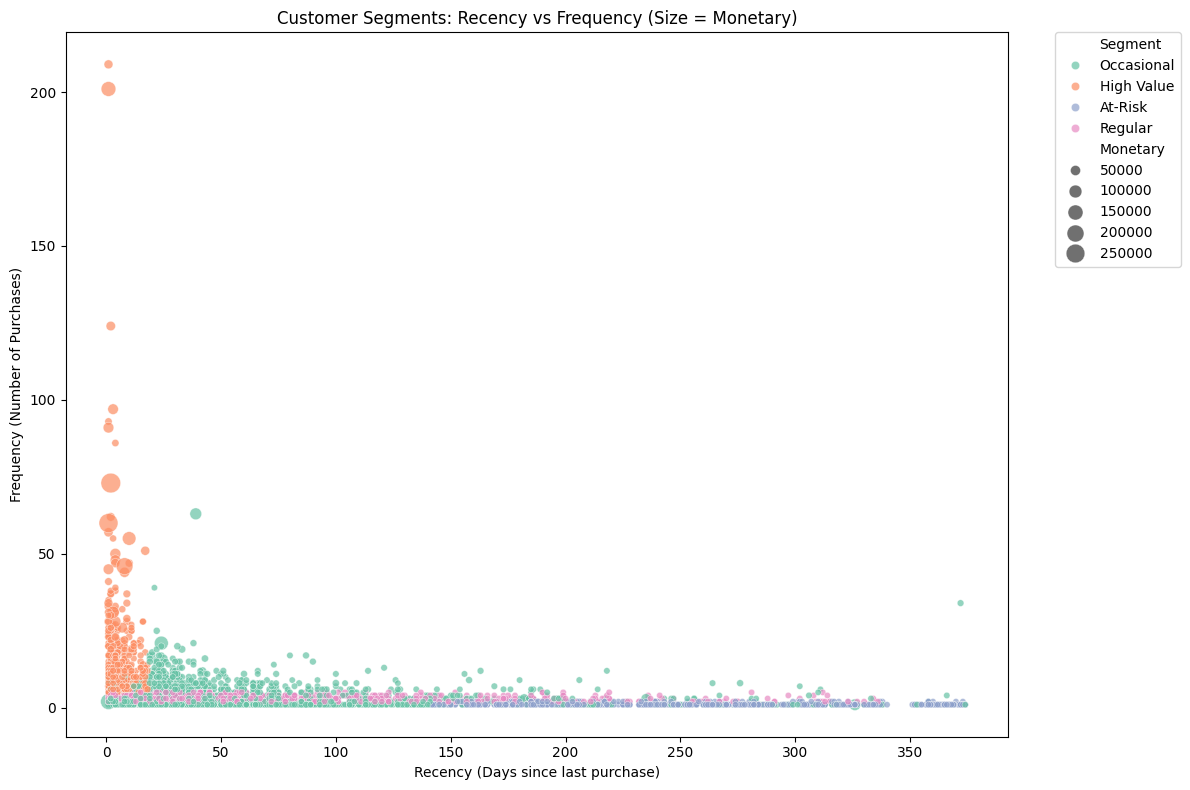

In [54]:
# Scatter plot of Recency vs Frequency colored by Segment, size by Monetary
plt.figure(figsize=(12,8))
scatter = sns.scatterplot(data=rfm,
    x='Recency',
    y='Frequency',
    hue='Segment',
    size='Monetary',
    palette='Set2',
    sizes=(20, 200),
    alpha=0.7
)

plt.title('Customer Segments: Recency vs Frequency (Size = Monetary)')
plt.xlabel('Recency (Days since last purchase)')
plt.ylabel('Frequency (Number of Purchases)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()

In [55]:
# Saving model
joblib.dump(kmeans, 'rfm_hierarchical.pkl')

['rfm_hierarchical.pkl']

#### 📊 RFM Clusters: Hierarchical Clustering

This scatter plot visualizes customer segments based on **RFM (Recency, Frequency, Monetary)** scores, where each customer is categorized according to their **Recency** (days since last purchase), **Frequency** (number of purchases), and **Monetary** value (represented by the **bubble size**).

#### Plot Details:

- **X-axis**: Recency (days since last purchase)
- **Y-axis**: Frequency (number of purchases)
- **Bubble Size**: Represents the **Monetary value** of each customer
- **Color Legend**:
  - 🟢 **Occasional**: Customers with infrequent purchases and recent activity
  - 🟠 **High Value**: Loyal customers with both recent and frequent purchases
  - 🔵 **At-Risk**: Customers who haven't made a purchase in a long time
  - 🟣 **Regular**: Steady, but not frequent enough to be categorized as high value

#### Interpretation:

- **High Value (🟠)** customers are clustered in the **bottom-left** of the plot with **low recency** and **high frequency**, indicating **frequent and recent buyers**. These customers have **large bubble sizes** representing high monetary value.
- **Occasional (🟢)** customers are scattered across the plot with **moderate recency** and **low frequency**. They are typically **sporadic buyers** with smaller bubbles, representing lower monetary values.
- **At-Risk (🔵)** customers appear in the **right part** of the plot with **high recency** and **low frequency**, indicating they haven’t purchased in a long time. These customers have **smaller bubbles**.
- **Regular (🟣)** customers lie in the **middle** of the plot with **moderate recency** and **moderate frequency**, indicating **consistent, but not frequent, buyers**. Their monetary values are moderate as well.

#### Insights & Recommendations:

1. **High Value Customers**:
   - **Action**: Target with personalized offers, loyalty rewards, and premium services.
   - **Insight**: These are the top spenders and should be retained with exclusive campaigns.
  
2. **Occasional Customers**:
   - **Action**: Engage with targeted promotions to increase purchase frequency.
   - **Insight**: There’s potential to increase loyalty by encouraging repeat purchases.

3. **At-Risk Customers**:
   - **Action**: Implement re-engagement campaigns (e.g., discounts, surveys, or reminders).
   - **Insight**: These customers haven’t made recent purchases and need to be lured back.

4. **Regular Customers**:
   - **Action**: Keep them engaged with seasonal or periodic offers.
   - **Insight**: Reliable buyers who might be converted into high-value customers.

---

## 📊 Clustering Algorithm Comparison: K-means, DBSCAN, and Hierarchical Clustering

The following table compares the three clustering models based on their performance, strengths, and weaknesses.

| **Algorithm**               | **Clusters**                          | **Pros**                                                         | **Cons**                                                          | **Recommendation**                        |
|-------------------------|---------------------------------------|------------------------------------------------------------------|-------------------------------------------------------------------|-------------------------------------------|
| **K-means**   | - Clear separation into High-Value, Regular, and At-Risk segments<br>- No Noise/Outlier points | - Clear, well-defined clusters<br>- Easy to interpret and actionable segmentation | - Requires specifying number of clusters upfront<br>- May struggle with non-spherical or irregular clusters<br>- Sensitive to outliers | Best model for clear, actionable customer segments |
| **DBSCAN**    | - Segments: High-Value, Regular, Occasional<br>- Noise/Outlier points detected | - Handles noise and outliers well<br>- Can detect clusters of varying shapes and densities | - Sensitive to parameters like `eps` (distance threshold)<br>- Less distinct segmentation, especially for Occasional customers | Consider if you need flexibility with irregular clusters and noise handling |
| **Hierarchical** | - Clear segments: High-Value, Regular, Occasional<br>- Provides a Dendrogram for detailed analysis | - No need to specify number of clusters upfront<br>- Works well for complex structures | - Computationally expensive<br>- Clusters can be over-split or have unclear boundaries | Good for exploring cluster hierarchies, but computationally heavy |

#### **Recommendation: Best Model**

**K-means** is the best model.

**Reasons**:
- **Clear and distinct clusters**: The segmentation into High-Value, Regular, and At-Risk customers is well-defined, making it easy to interpret.
- **Actionable segmentation**: The clusters are useful for targeted marketing and business decisions.
- **No noise/outliers**: All data points are grouped into meaningful segments.

---

#### **When to Consider Other Models**:
- **DBSCAN**: If you expect **clusters of varying density** and need to handle **outliers** effectively, DBSCAN might be more appropriate.
- **Hierarchical Clustering**: If you want to **visualize the cluster hierarchy** or have **uncertain cluster counts**, this method provides flexibility, though it’s slower and may result in over-splitting.
---

### Streamlit App Deployment: `Shopper_Spectrum_app.py`

The deployment-ready Streamlit application integrates all key components:

#### Features

- **Customer Segmentation Module:**  
  - Accepts user input for Recency, Frequency, and Monetary values.  
  - Applies saved `StandardScaler` to preprocess input.  
  - Predicts customer cluster via saved KMeans model.  
  - Maps predicted cluster to intuitive segment labels using precomputed `rfm_segmented.csv`.  
  - Displays real-time segmentation results interactively.

- **Product Recommendation Module:**  
  - Accepts product name input (mapped internally to StockCode).  
  - Uses the saved product similarity matrix (`product_similarity.pkl`) for collaborative filtering-based recommendations.  
  - Returns the top 5 (or user-selected number) similar products with descriptive names.  
  - Handles errors gracefully when product input is invalid or missing.

#### Architecture

- Loads and applies saved models and datasets (`rfm_scaler.pkl`, `rfm_kmeans.pkl`, `product_similarity.pkl`, `rfm_segmented.csv`, `product_mapping.csv`).  
- Utilizes efficient lookups between product names and codes for a smooth UX.  
- Offers tabbed UI in Streamlit for easy switching between segmentation and recommendations.  
- Visualizes recommendations and segmentation results clearly, enabling business users to make informed decisions.

---

#### Summary

This consolidated app empowers e-commerce teams to harness shopper intelligence via:

- Effective segmentation identifying customer value tiers.  
- Tailored product recommendations enhancing upsell and cross-sell.  
- Interactive, user-friendly interface that bridges data science and business strategy seamlessly.

By deploying `Shopper_Spectrum_app.py`, organizations can realize significant gains in customer targeting precision and recommendation relevance — driving better engagement and revenue growth.

🚀 **Run the app locally:** 

`streamlit run Shopper_Spectrum_app.py`


Explore e-commerce insights like never before with the Shopper Spectrum solution!

---

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

### 🛒 Shopper Spectrum: Conclusion and Streamlit Deployment Overview

#### Conclusion

The **Shopper Spectrum** project successfully demonstrates an end-to-end E-Commerce analytics pipeline that leverages:

- **KMeans Clustering** on standardized RFM (Recency, Frequency, Monetary) features to segment customers meaningfully into groups like High-Value, Regular, Occasional, and At-Risk.  
- **Feature Scaling (StandardScaler)** ensures all RFM variables contribute equally to the clustering by removing unit and scale bias.  
- A **Product Similarity Matrix** constructed using collaborative filtering (cosine similarity) based on customer purchase patterns, enabling targeted product recommendations.  
- A well-structured and reusable **rfm_segmented.csv** dataset that holds customer segment labels for quick analysis and business use.  

This pipeline translates raw transactional data into actionable insights for personalized marketing, retention strategies, and product upselling.

---

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***